# Credit Card Spending Habits in India Analysis

### https://www.kaggle.com/datasets/thedevastator/analyzing-credit-card-spending-habits-in-india

In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

import warnings
warnings.filterwarnings('ignore')

In [216]:
credit = pd.read_csv('CreditData.csv', index_col='index')
credit.sample(10)

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
25079,"Pune, India",1-Nov-14,Gold,Entertainment,F,285630
7168,"Delhi, India",18-Nov-13,Signature,Fuel,M,16066
16450,"Puliyankudi, India",6-Aug-14,Platinum,Entertainment,M,280652
18056,"Ponnani, India",26-Nov-13,Gold,Grocery,M,191416
21751,"Jaipur, India",17-Apr-15,Platinum,Entertainment,M,153244
25234,"Kolkata, India",29-Apr-14,Signature,Fuel,F,204950
13917,"Delhi, India",4-Apr-14,Gold,Fuel,M,80596
20971,"Jaipur, India",22-May-14,Signature,Entertainment,F,162169
15980,"Nautanwa, India",13-Dec-14,Silver,Bills,M,256918


## Data Cleaning

In [217]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [218]:
# Convert into DateTime
credit['Date'] = pd.to_datetime(credit['Date'])

In [219]:
# Remove word India (All cities in India)
print(len(credit[credit['City'].str.contains('India')]) == len(credit))
credit['City'] = credit['City'].str.split(',').str[0]

True


In [220]:
credit.City.unique()[:5]

array(['Delhi', 'Greater Mumbai', 'Bengaluru', 'Ahmedabad', 'Markapur'],
      dtype=object)

In [221]:
credit.rename(columns={'Exp Type': 'Category'}, inplace=True) # Suitiable col name

In [222]:
credit['Gender'] = credit.Gender.apply(lambda x: 'Female' if x == 'F' else 'Male')

In [91]:
credit.to_csv('CreditDataCleaned.csv')
credit.head()

,City,Date,Card Type,Category,Gender,Amount
index,,,,,,
0,Delhi,2014-10-29,Gold,Bills,Female,82475
1,Greater Mumbai,2014-08-22,Platinum,Bills,Female,32555
2,Bengaluru,2014-08-27,Silver,Bills,Female,101738
3,Greater Mumbai,2014-04-12,Signature,Bills,Female,123424
4,Bengaluru,2015-05-05,Gold,Bills,Female,171574


## EDA

In [231]:
credit['Card Type'].value_counts(normalize=True) * 100 # Silver is the most usable card

Card Type
Silver       26.255182
Signature    24.746661
Platinum     24.558575
Gold         24.439582
Name: proportion, dtype: float64

In [232]:
credit['Category'].value_counts(normalize=True) * 100 # Food is the most popular category

Category
Food             20.969599
Fuel             20.178873
Bills            19.491786
Entertainment    18.278827
Grocery          18.248119
Travel            2.832796
Name: proportion, dtype: float64

In [233]:
credit['Gender'].value_counts(normalize=True) * 100 # Female dominate over male

Gender
Female    52.510364
Male      47.489636
Name: proportion, dtype: float64

In [236]:
print(f'Average amount: \
{np.round(np.mean(credit.Amount), 2)}\nMedian: \
{np.median(credit.Amount)}\n25%: \
{np.quantile(credit.Amount, 0.25)}\n75%: \
{np.quantile(credit.Amount, 0.75)}')

Average amount: 156411.54
Median: 153106.5
25%: 77120.25
75%: 228050.0


In [227]:
print(np.round(credit[credit['Gender'] == 'Male']['Amount'].mean(),2), 'Male average')
print(np.round(credit[credit['Gender'] == 'Female']['Amount'].mean(),2), 'Female average')

151109.15 Male average
161206.95 Female average


In [228]:
cat_gender_sum = np.round(credit.pivot_table(columns='Gender', index='Category', values='Amount'), 2)
cat_gender_sum

Gender,Female,Male
Category,,
Bills,202809.60,147446.80
Entertainment,150446.03,154656.94
Food,150337.74,151736.73
Fuel,149897.75,150323.26
Grocery,150595.96,151573.91
Travel,147402.45,148718.89


In [237]:
credit.groupby(['Category'])['Amount'].sum() / credit['Amount'].sum() * 100
# Spend the most on bills

Category
Bills            22.260357
Entertainment    17.827417
Food             20.239454
Fuel             19.366088
Grocery          17.625455
Travel            2.681229
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Category Side by Side')

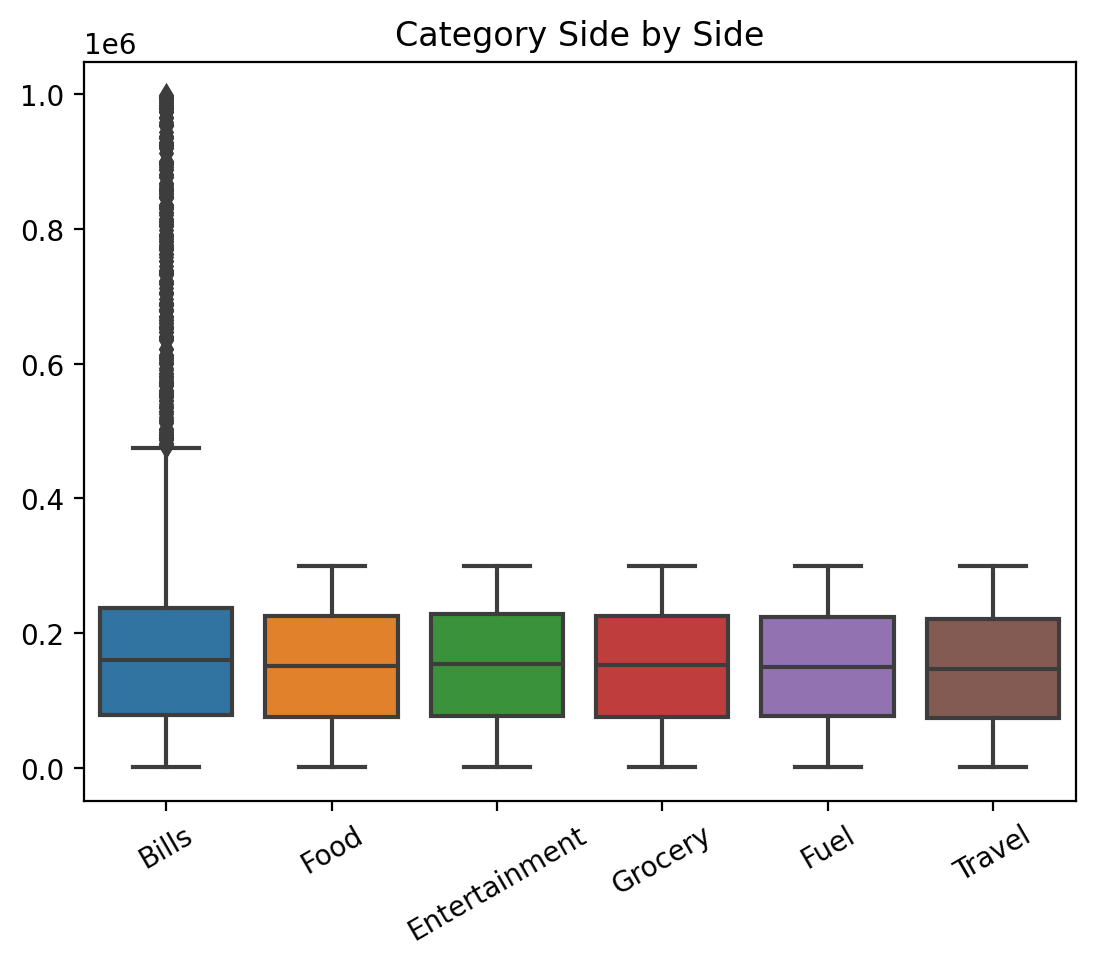

In [230]:
sns.boxplot(data=credit, x='Category', y='Amount')
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
plt.title('Category Side by Side')

Text(0.5, 1.0, 'Card Type Side by Side')

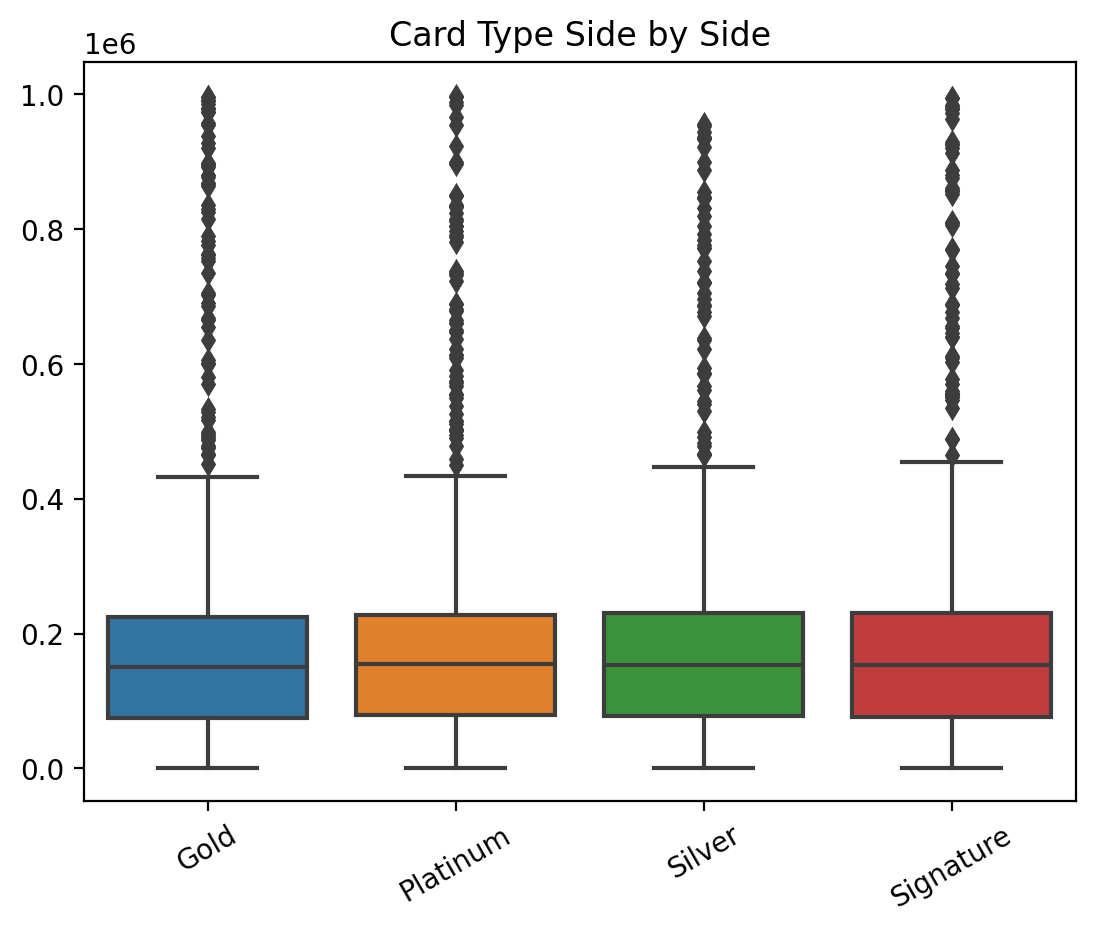

In [214]:
sns.boxplot(data=credit, x='Card Type', y='Amount')
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
plt.title('Card Type Side by Side')

## Spending amount difference between female and male group

Text(0.5, 1.0, 'Amount distribution')

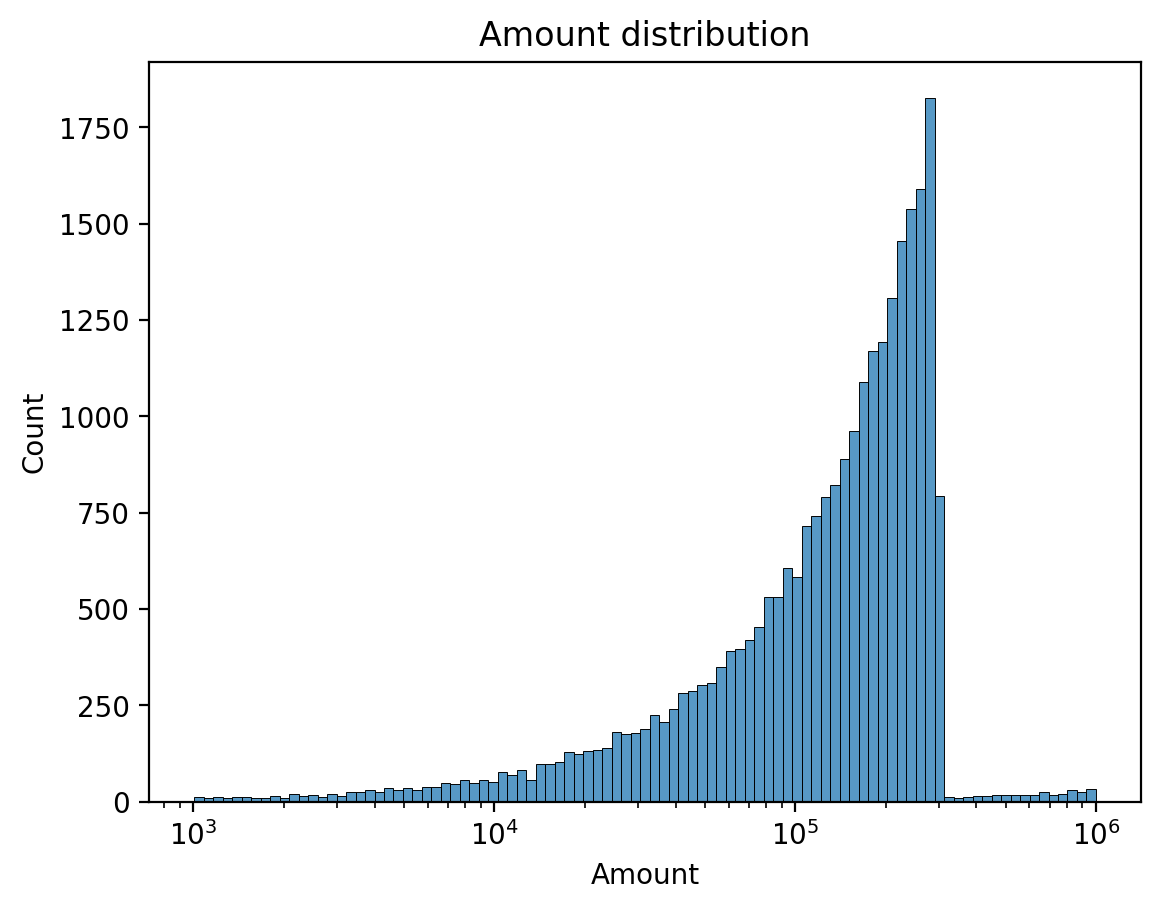

In [155]:
sns.histplot(data=credit, x='Amount', log_scale=True)
plt.title('Amount distribution')

In [184]:
stats.shapiro(credit.Amount)

ShapiroResult(statistic=0.8734557628631592, pvalue=0.0)

### Distribution is not normal, we can not use T-test to check difference

### We will use Mannwhitneyu instead, take significant value 0.05 

In [186]:
stats.mannwhitneyu(credit[credit['Gender'] == 'Male']['Amount'], credit[credit['Gender'] == 'Female']['Amount'])

MannwhitneyuResult(statistic=83151064.0, pvalue=0.015071403770538472)

### P-value < 0.05 => There is significant differnce between female and male group

# Visualization

https://public.tableau.com/views/CreditCardSpendingHabitsinIndia_17265012471990/Dashboard?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link